### PROBLEM STATEMENT

Breast cancer is one of the most common type of cancer in women. Many devices are built which detect the breast cancer but many times lead to false positives, which results is patients undergoing painful, expensive surgeries that were not even necessary. These type of cancers are called benign which do not require surgeries and we can reduce these unnecessary surgeries by using Machine Learning. We use a previous breast cancer patients dataset and train a model to predict whether the cancer is benign or malignant. These predictions can help doctors to do surgeries only when the cancer is not benign but malignant.

### Let's import the following dependencies

#### 1. Numpy
#### 2. Pandas
#### 3. Matplotlib
#### 4. Seaborn
#### 5. Sklearn

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
import sklearn

### Let's load the dataset

#### data.csv

In [ ]:
# Loading the dataset
df = pd.read_csv("data.csv")

#### Read the dataset df

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Understanding the dataset

#### Check for the following
1. Shape
2. Columns
3. Description
4. Unique values
5. Missing values

In [ ]:
# shape of the data
df.shape

(569, 33)

In [ ]:
# Columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Description
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Unique values
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
# Missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
""" we can noticed that there is no missing
values except int the Unnamed column which 
consistent of 569 missing values """

' we can noticed that there is no missing\nvalues except int the Unnamed column which \nconsistent of 569 missing values '

### Taking care of missing values

In [ ]:
# Let's drop the Unnamed Columbia
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [ ]:
df_mean = df[['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean']]

In [ ]:
df_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
df_se = df[['radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se']]

In [ ]:
df_se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [ ]:
df_worst = df[['radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst',
'fractal_dimension_worst']]

In [ ]:
df_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### EDA

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

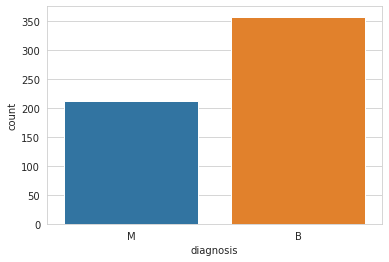

In [ ]:
sns.countplot(df.diagnosis)

([<matplotlib.patches.Wedge at 0x7f7c4b131810>,
 [Text(-0.46762330904436317, 1.105137295017411, 'Benign'),
  Text(0.46762320557394, -1.1051373387994603, 'Malignant')],
 [Text(-0.2727802636092118, 0.6446634220934897, '62.7%'),
  Text(0.27278020325146496, -0.6446634476330184, '37.3%')])

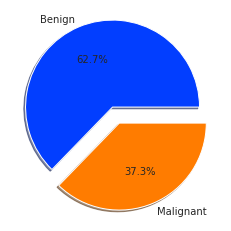

In [ ]:
colors=sns.color_palette('bright')
plt.pie(df['diagnosis'].value_counts(),
labels = ['Benign','Malignant'],
autopct=('%1.1f%%'),
explode = [0.1,0.1],
colors = colors,
shadow='True')

### Let's check for the correlation between the variables of the dataset

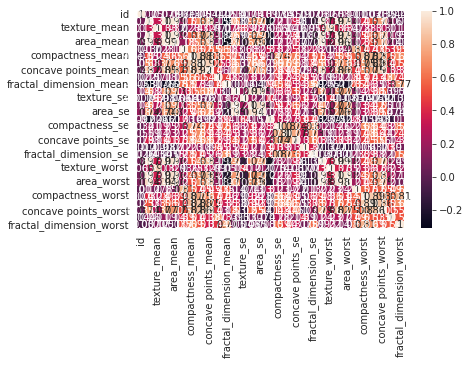

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True)

### Splitting the dataset

In [ ]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
Y = np.reshape(y, (-1,1))

In [ ]:
print(X.shape)
print(Y.shape)

(569, 30)
(569, 1)


### Categorical Data

Categorical data are variables that contain label values rather than numeric values.


We will use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [ ]:
# Encoding labelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

### Splitting the dataset into Training set and Test set

In [95]:
# Train and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


### Feature Scaling

We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale

In [97]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Model Selection

In the dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.

We have different types of classification algorithms in Machine Learning and we are going to use all:-

1. Logistic Regression

2. Nearest Neighbor

3. Support Vector Machines

4. Kernel SVM

5. Naïve Bayes

6. Decision Tree Algorithm

7. Random Forest Classification

In [122]:
# Using scikit learn to import all algorithms

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)

# Prediction
lr_pred = lr.predict(X_test)
lr_pred

# Let's check the score
print('Training Accuracy is :', lr.score(X_train,y_train))
print('Testing Accuracy is :', lr.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_pred)
cm

Training Accuracy is : 0.9906103286384976
Testing Accuracy is : 0.958041958041958


array([[87,  3],
       [ 3, 50]])

In [123]:
# KNearestNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
Knn.fit(X_train,y_train)

# Prediction
Knn_pred = Knn.predict(X_test)
Knn_pred

# Let's check the score
print('Training Accuracy is :', Knn.score(X_train,y_train))
print('Testing Accuracy is :', Knn.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Knn_pred)
cm

Training Accuracy is : 0.9741784037558685
Testing Accuracy is : 0.951048951048951


array([[89,  1],
       [ 6, 47]])

In [124]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state=0)
svc.fit(X_train,y_train)

# Prediction
svc_pred = svc.predict(X_test)
svc_pred

# Let's check the score
print('Training Accuracy is :', svc.score(X_train,y_train))
print('Testing Accuracy is :', svc.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svc_pred)
cm

Training Accuracy is : 0.9859154929577465
Testing Accuracy is : 0.972027972027972


array([[88,  2],
       [ 2, 51]])

In [125]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',random_state = 0)
svc.fit(X_train,y_train)

# Prediction
svc_pred = svc.predict(X_test)
svc_pred

# Let's check the score
print('Training Accuracy is :', svc.score(X_train,y_train))
print('Testing Accuracy is :', svc.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svc_pred)
cm

Training Accuracy is : 0.9859154929577465
Testing Accuracy is : 0.965034965034965


array([[88,  2],
       [ 3, 50]])

In [126]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

# Prediction
gb_pred = gb.predict(X_test)
gb_pred

# Let's check the score
print('Training Accuracy is :', gb.score(X_train,y_train))
print('Testing Accuracy is :', gb.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,gb_pred)
cm

Training Accuracy is : 0.9483568075117371
Testing Accuracy is : 0.916083916083916


array([[84,  6],
       [ 6, 47]])

In [127]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

# Prediction
dtc_pred = dtc.predict(X_test)
dtc_pred

# Let's check the score
print('Training Accuracy is :', dtc.score(X_train,y_train))
print('Testing Accuracy is :', dtc.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,dtc_pred)
cm

Training Accuracy is : 1.0
Testing Accuracy is : 0.8741258741258742


array([[75, 15],
       [ 3, 50]])

In [128]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# Prediction
rfc_pred = rfc.predict(X_test)
rfc_pred

# Let's check the score
print('Training Accuracy is :', rfc.score(X_train,y_train))
print('Testing Accuracy is :', rfc.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rfc_pred)
cm

Training Accuracy is : 1.0
Testing Accuracy is : 0.972027972027972


array([[87,  3],
       [ 1, 52]])

We can see the accuracy of the algorithms used by using confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

After applying the different classification models, we have got below accuracies with different models:

1. Logistic Regression — 99%

2. Nearest Neighbor — 97%

3. Support Vector Machines — 98%

4. Kernel SVM — 98%

5. Naive Bayes — 94%

6. Decision Tree Algorithm — 100%

7. Random Forest Classification — 100%

Now, we can see that Decision Tree Algorithm and Random Forest Classification gives the best results for the classification....

## Visualization

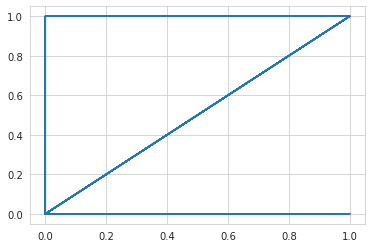

In [133]:
plt.plot(y_test, lr_pred)